### Python NumPy Aggegates

Jay Urbain, PhD

7/2/2018

Numpy aggregations and simple plotting.

References:  
http://www.numpy.org/  
https://docs.scipy.org/doc/numpy/user/quickstart.html  
https://jakevdp.github.io/PythonDataScienceHandbook/  
http://shop.oreilly.com/product/0636920033400.do  


#### Aggregations

When faced with a large amount of data, a first step is to compute summary statistics for the data in question.

A couple of the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset. Other aggregates are useful are also useful:  
- sum  
- product  
- median  
- minimum  
- maximum  
- quantiles  

NumPy has many fast built-in aggregation functions for working on arrays.

#### Sum

Compute the sum of all values in an array.

Note: Python itself can do this using the built-in ``sum`` function.

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
sum(L) # python sum over list

51.062545535130845

In [3]:
np.sum(L) # numpy sum 

51.06254553513083

Because numpy executes the operation in compiled code, NumPy's version of the operation is computed much more quickly.

In [4]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

146 ms ± 5.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.2 ms ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Note: the ``sum`` function and the ``np.sum`` function are not identical.

Each have optional arguments that have different meanings, and ``np.sum`` is aware of multiple array dimensions.

#### Min and Max

Python has built-in ``min`` and ``max`` functions, used to find the minimum and maximum values of any given array.

In [5]:
min(big_array), max(big_array)

(1.1854377479636469e-07, 0.9999981667611603)

NumPy's corresponding functions:

In [6]:
np.min(big_array), np.max(big_array)

(1.1854377479636469e-07, 0.9999981667611603)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

61.8 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
465 µs ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For ``min``, ``max``, ``sum``, and other NumPy aggregates, a shorter syntax is to use methods of the array object itself.

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

1.1854377479636469e-07 0.9999981667611603 500491.25242858304


Cleary, you should make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays. Trust me, its easy to miss this!

#### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column in a 2D array.

In [9]:
M = np.random.random((3, 4))
print(M)

[[0.64517678 0.89200166 0.54860643 0.33811467]
 [0.03054779 0.80522363 0.92132996 0.8052259 ]
 [0.90856691 0.79599425 0.8867099  0.21350515]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [10]:
M.sum()

7.791003040733378

In [11]:
m = np.array([[1,2,3], [3,4,5], [6,7,8]])
m

array([[1, 2, 3],
       [3, 4, 5],
       [6, 7, 8]])

In [12]:
np.sum(m)

39

In [13]:
np.sum(m, axis=0)

array([10, 13, 16])

In [14]:
np.sum(m, axis=1)

array([ 6, 12, 21])

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. 

For example, we can find the minimum value within each column (across rows) by specifying ``axis=0``:

In [15]:
M.min(axis=0)

array([0.03054779, 0.79599425, 0.54860643, 0.21350515])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [16]:
M.max(axis=1)

array([0.89200166, 0.92132996, 0.90856691])

The way the axis is specified can be confusing.

The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.

So specifying ``axis=0`` means that the first axis (rows) will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

#### Other aggregation functions

Note: most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |



#### Example: What is the Average Height of US Presidents?

Aggregates can be very helpful for summarizing a set of values.

Consider the heights of all US presidents. This data is available in the file *data/president_heights.csv*, which is a comma-separated list of labels and values.

In [18]:
!head -4 data/president_heights.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


We'll use the Pandas package, to read the file and extract this information. *Note: the heights are measured in centimeters.*

In [19]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv')
print( type(data) )
heights = np.array(data['height(cm)'])
print( type(heights) )
print(heights)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics.

#### Question

Compute and display the height mean, standard deviation, min, and max in the cell below.

In [25]:
print("Mean height:       ", np.mean(heights))
print("Standard deviation:", np.std(heights))
print("Minimum height:    ", np.min(heights))
print("Maximum height:    ", np.max(heights))

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note: in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.

#### Question

Compute the 25th, median, and 75th quintile in the cell belo:

In [26]:
print("25th percentile:   ", np.percentile(heights,25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights,75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is ?? cm, or just shy of six feet.

We can plot this data using tools in Matplotlib: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

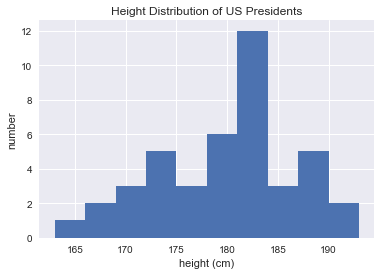

In [28]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

Boxplot

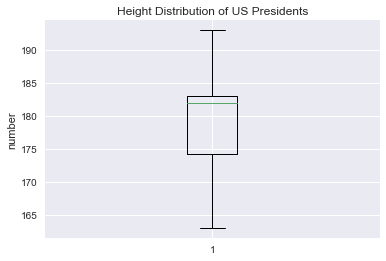

In [29]:
plt.boxplot(heights)
plt.title('Height Distribution of US Presidents')
plt.ylabel('number');

These aggregates represent some of the `exploratory data analysis` we will pursue in greater depth.

#### Question

In the cell below, identify the 25th, median, and 75th quintile from the box plot above. Does this match your calculations from the previous question?

##### your answer here



